In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [37]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [38]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)


test_data = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [40]:
cifar_10_classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
type(trainloader)

In [44]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

classes = train_data.classes

In [46]:
images.shape #batch_size x channels x height x width

torch.Size([32, 3, 32, 32])

In [57]:
len(trainloader.dataset)

50000

In [58]:
len(trainloader)

1563

In [59]:
50000/32

1562.5

In [47]:
images[0].shape

torch.Size([3, 32, 32])

In [48]:
np.transpose(images[0], (1, 2, 0)).shape

torch.Size([32, 32, 3])

In [49]:
def show_images(images, labels, classes):
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    axes = axes.flatten()
    for img, ax, label in zip(images, axes, labels):
        img = img / 2 + 0.5  # unnormalize
        npimg = img.numpy()
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        ax.set_title(classes[label])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

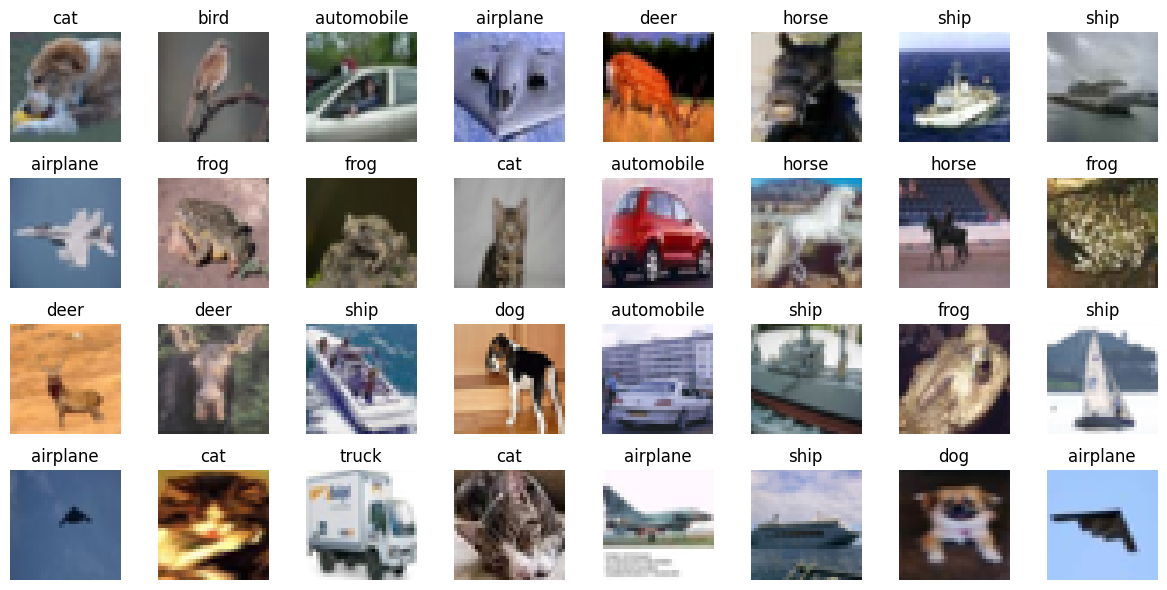

In [50]:
show_images(images, labels, classes)

In [42]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [51]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [53]:
num_epochs = 3
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs) #forward
        loss = criterion(outputs, labels) #forward
        loss.backward() # backward
        optimizer.step() #backward

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

Epoch [1/3], Step [100/1563], Loss: 1.3826
Epoch [1/3], Step [200/1563], Loss: 1.3650
Epoch [1/3], Step [300/1563], Loss: 1.3361
Epoch [1/3], Step [400/1563], Loss: 1.3106
Epoch [1/3], Step [500/1563], Loss: 1.2820
Epoch [1/3], Step [600/1563], Loss: 1.2736
Epoch [1/3], Step [700/1563], Loss: 1.2027
Epoch [1/3], Step [800/1563], Loss: 1.2149
Epoch [1/3], Step [900/1563], Loss: 1.1663
Epoch [1/3], Step [1000/1563], Loss: 1.1637
Epoch [1/3], Step [1100/1563], Loss: 1.1685
Epoch [1/3], Step [1200/1563], Loss: 1.1547
Epoch [1/3], Step [1300/1563], Loss: 1.1385
Epoch [1/3], Step [1400/1563], Loss: 1.1560
Epoch [1/3], Step [1500/1563], Loss: 1.1205
Epoch [2/3], Step [100/1563], Loss: 1.0558
Epoch [2/3], Step [200/1563], Loss: 1.0459
Epoch [2/3], Step [300/1563], Loss: 1.0118
Epoch [2/3], Step [400/1563], Loss: 1.0449
Epoch [2/3], Step [500/1563], Loss: 1.0062
Epoch [2/3], Step [600/1563], Loss: 1.0009
Epoch [2/3], Step [700/1563], Loss: 1.0444
Epoch [2/3], Step [800/1563], Loss: 0.9897
Epoch

In [56]:
len(trainloader.dataset)

50000

In [60]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the network on the 10000 test images: 66.67%


In [61]:
dataiter = iter(testloader)
images, labels = next(dataiter)

Actual


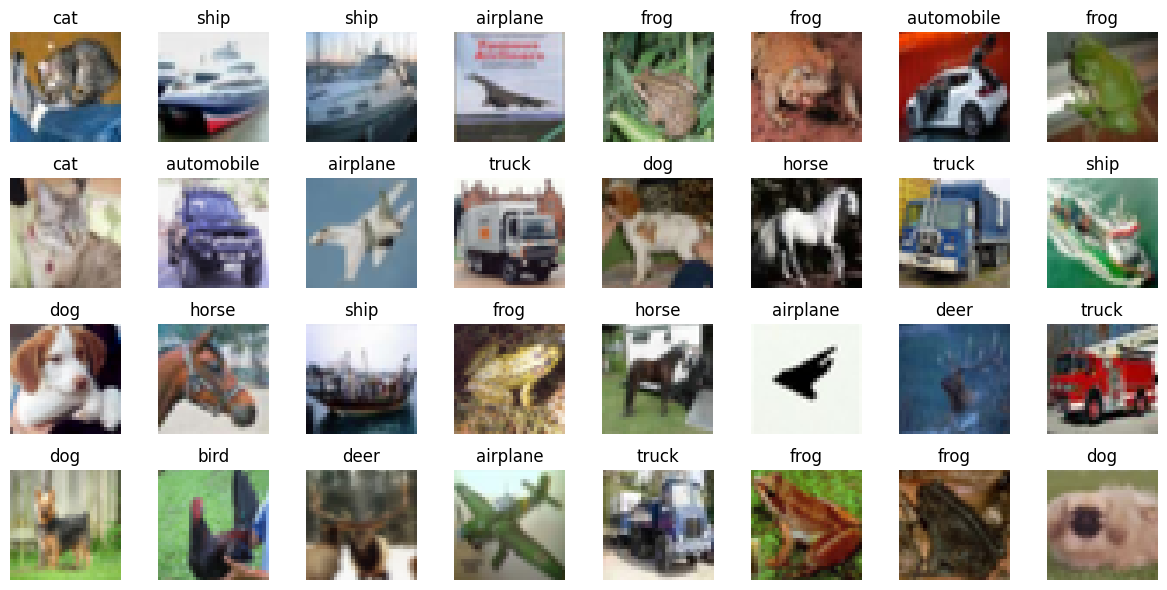

In [63]:
print("Actual")
show_images(images, labels, classes)

Predicted:


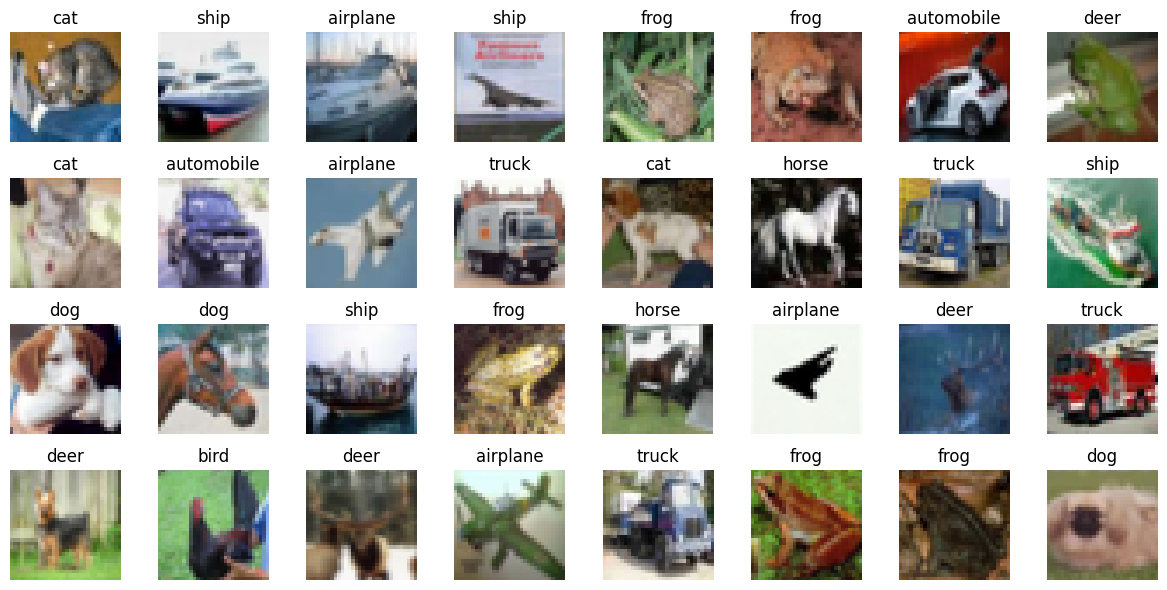

In [62]:
outputs = model(images)
_, predicted = torch.max(outputs, 1)
print("Predicted:")
show_images(images, predicted, classes)